In [1]:
!pip install blimpy
!wget http://blpd13.ssl.berkeley.edu/borisov/AGBT19B_999_124/spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil

     |████████████████████████████████| 276kB 4.9MB/s 
     |████████████████████████████████| 5.4MB 8.1MB/s 
--2020-05-21 02:40:20--  http://blpd13.ssl.berkeley.edu/borisov/AGBT19B_999_124/spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil
Resolving blpd13.ssl.berkeley.edu (blpd13.ssl.berkeley.edu)... 208.68.240.55
Connecting to blpd13.ssl.berkeley.edu (blpd13.ssl.berkeley.edu)|208.68.240.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8776581466 (8.2G) [application/octet-stream]
Saving to: ‘spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil’

spliced_blc40414243 100%[===================>]   8.17G  55.7MB/s    in 2m 49s  

2020-05-21 02:43:09 (49.5 MB/s) - ‘spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil’ saved [8776581466/8776581466]



In [1]:
from blimpy import Waterfall
import pylab as plt
import numpy as np
%matplotlib inline
header = Waterfall('/content/spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil',load_data=True)
header.info()

blimpy.io.base_reader WARNING  Selection size of 8.17 GB, exceeding our size limit 1.00 GB. Instance created, header loaded, but data not loaded, please try another (t,v) selection.

--- File Info ---
     rawdatafile :                                 
     source_name :                     PSR_B0355+54
      machine_id :                               10
    telescope_id :                                6
         src_raj :                      3:58:53.496
         src_dej :                      54:13:14.88
        az_start :                              0.0
        za_start :                              0.0
       data_type :                                1
            fch1 :            11251.28173828125 MHz
            foff :                -0.3662109375 MHz
          nchans :                            10240
          nbeams :                                0
           ibeam :                                0
           nbits :                                8
   tstart (ISOT) : 

In [2]:
obs = Waterfall('/content/spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil', 
               t_start=0,
               t_stop= 40000,
               max_load=10)

data = obs.data
# obs.plot_all()

blimpy.io.base_reader WARNING  Setting data limit != 1GB, please handle with care!


In [0]:
def average(arr):
  sum =0
  for i in range(arr.shape[0]):
    sum+=arr[i]
  return sum/arr.shape[0]

In [0]:
import math
def SNR(arr):
  index = np.argmax(arr)
  average_noise = average(arr)
  return math.log(arr[index]/average_noise) 

In [10]:
sensitivity = 5
start = 100
max = 1000
snrs = []
for period in range(start,max,sensitivity):
  
  fold = np.zeros((period, data.shape[2]))
  results = np.zeros((period))
  multiples = int(data.data.shape[0]/period)

  for i in range(multiples-1):
    fold[:,:]=data[i*period:(i+1)*period,0,:]+ fold
  
  results = fold.mean(axis=1)
  snr_single = SNR(results)
  snrs.append(snr_single)
  print("Period folding... "+str(period)+ " SNR: "+str(snr_single))
  plt.plot(results)
  plt.savefig('/content/drive/My Drive/Deeplearning/Pulsars/output/multichan/multi_chan_'+str(period)+'.png')
  plt.close()

Period folding... 100 SNR: 0.00020730721101905355
Period folding... 105 SNR: 0.0002496602929615398
Period folding... 110 SNR: 0.0003207555515027663
Period folding... 115 SNR: 0.0002559760844370896
Period folding... 120 SNR: 0.00036809520688396605
Period folding... 125 SNR: 0.0003002704079399647
Period folding... 130 SNR: 0.0003431526748084843
Period folding... 135 SNR: 0.00037479328006933036
Period folding... 140 SNR: 0.00044414643858585153
Period folding... 145 SNR: 0.00039094846925207726
Period folding... 150 SNR: 0.00045357220057953764
Period folding... 155 SNR: 0.00041194663617157403
Period folding... 160 SNR: 0.000505577795558841
Period folding... 165 SNR: 0.0005698855411184718
Period folding... 170 SNR: 0.0004584976767160763
Period folding... 175 SNR: 0.00038041427473684453
Period folding... 180 SNR: 0.0003733355502806667
Period folding... 185 SNR: 0.00047075719134368046
Period folding... 190 SNR: 0.0004554123374993688
Period folding... 195 SNR: 0.0006371924205466729
Period foldi

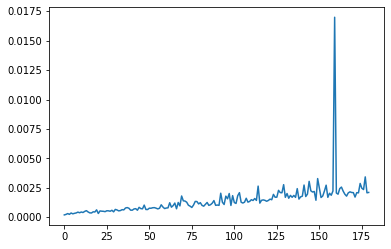

In [11]:
plt.plot(snrs)

(1000,)


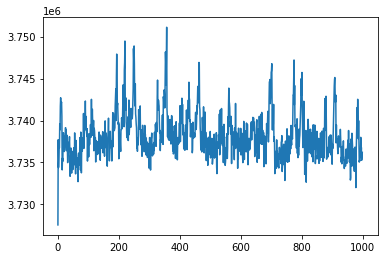

In [0]:
period = 1000
fold = np.zeros((period, data.shape[2]))
multiples = int(data.data.shape[0]/period)
results = np.zeros((period))

for i in range(multiples-1):
  fold[:,:]=data[i*period:(i+1)*period,0,:]+ fold


results = fold.sum(axis=1)
print(results.shape)
# plt.plot(fold[:,4])
plt.plot(results)
plt.savefig('/content/drive/My Drive/Deeplearning/Pulsars/output/'+str(2)+'.png')

In [4]:
average_power = np.zeros(data.shape[2])
for i in range(data.shape[2]):
  average_power[i] = average(data[:,0,i])
plt.plot(average_power)

KeyboardInterrupt: ignored